In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
from plotly.offline import iplot, plot

In [2]:
from CarFactory import CarFactory
from Street import Street, StreetRamp, StreetAuto
from Constants import *

In [3]:
prob_auto, prob_car = .5, .5
num_lane = 3
road_length = 500 # 5 km
flow_in = 20 # vehicle per second

In [4]:
cf = CarFactory(prob_auto, prob_car)
road = Street(num_lane, road_length, cf)
for i in range(1000):
    road.update(flow_in)
    
    if i % 100 == 0:
        road.report()

-----------------------------------------------------------------
time =  0.50
total vehicle:    3, average speed 26.11, flow in 0.00 vehicle/s, flow out 0.00 vehicle/s
	 num cars in each lane [1. 1. 1.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 50.50
total vehicle:   88, average speed 12.26, flow in 0.00 vehicle/s, flow out 0.00 vehicle/s
	 num cars in each lane [26. 31. 31.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 100.50
total vehicle:  118, average speed 8.41, flow in 2.18 vehicle/s, flow out 1.58 vehicle/s
	 num cars in each lane [43. 40. 35.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 150.50
total vehicle:  126, average speed 9.37, flow in 2.18 vehicle/s, flow out 1.58 vehicle/s
	 num cars in e

In [3]:
import plotly.graph_objs as go
color_map = dict()
color_map['0'] = 'rgb(255, 0, 0)'
color_map['1'] = 'rgb(204, 204, 0)'
color_map['2'] = 'rgb(0, 255, 0)'
color_map['3'] = 'rgb(0, 204, 204)'
color_map['4'] = 'rgb(0, 0, 255)'

def generate_fig(road):
    '''
    Input:
        street = list of "Moveable" --> Car or CarHuman
    Return:
        plolty fig
    '''
    lane_width = 5 # 5 m
    traces = []
    for car in road.street:
        trace = go.Scatter(x = [car.pos, car.pos+car.length],
                           y = [car.lane + 1, car.lane + 1],
                           mode = 'lines',
                           marker = dict( color = color_map['{}'.format(int(car.vel / (5.5)))]
                                           ))
        traces.append(trace)
    layout = go.Layout(title='traffic simulation at time {:6.1f}s'.format(road.time),
                       xaxis=dict(title='distance (meters)'),
                       yaxis=dict(title='lane number',
                                    showgrid=True,
                                    zeroline=False,
                                    showline=False,
                                    showticklabels=True),
                       showlegend=False)
    return go.Figure(data= traces, layout=layout)

In [6]:
fig = generate_fig(road)

In [7]:
py.iplot(fig)

## Experiment 1: base line
use the media of traffic flow per lane of the given dataset as our target traffic flow.

* auto_prob = 0

* car_prob = 0.8

* speed_limit = 60 MPH = 96 KMH

* flow_in = 1.31 v/s = 4725 v/h

* flow_in_ramp = 0.44 v/s = 1575 v/h

* flow_in_total = 1.75 v/s = 6300 v/h

* mile_post_dist = 0.821 mile = 1.31 km

simulation 1 hour to see a tyical rush hour in the morning or afternoon.

**Taeget:** average speed of average speed in each time step.

**Result:** v = 5.25 m/s = 18.9 KMH

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv('../../../data/2017_MCM_Problem_C_Data.csv')

In [13]:
data['mile post'] = data['endMilepost'] - data['startMilepost']
data['ratio'] = data['Average daily traffic counts Year_2015'] / (data['Number of Lanes DECR MP direction '] + data['Number of Lanes INCR MP direction'])

In [14]:
data.head()

,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Comments,mile post,ratio
0,5,100.93,101.87,65000,IS,3,3,Olympia,0.94,10833.333333
1,5,101.87,103.17,85000,IS,3,3,NaN,1.30,14166.666667
2,5,103.17,103.42,108000,IS,3,3,NaN,0.25,18000.000000
3,5,103.42,104.81,101000,IS,3,3,NaN,1.39,16833.333333
4,5,104.81,105.63,144000,IS,3,4,Rte 101 intersection,0.82,20571.428571


In [20]:
data.sort_values(by=['ratio'], ascending=False)

,Route_ID,startMilepost,endMilepost,Average daily traffic counts Year_2015,"RteType (IS= Interstate, SR= State Route)",Number of Lanes DECR MP direction,Number of Lanes INCR MP direction,Comments,mile post,ratio
69,5,163.48,164.22,242000,IS,2,3,NaN,0.74,48400.000000
68,5,163.36,163.48,238000,IS,2,3,NaN,0.12,47600.000000
183,405,10.56,10.93,177000,IS,2,2,NaN,0.37,44250.000000
170,405,3.30,3.69,172000,IS,2,2,NaN,0.39,43000.000000
181,405,9.59,9.96,161000,IS,2,2,NaN,0.37,40250.000000
177,405,6.72,7.20,154000,IS,2,2,NaN,0.48,38500.000000
173,405,4.79,5.19,153000,IS,2,2,NaN,0.40,38250.000000
179,405,7.69,8.98,152000,IS,2,2,NaN,1.29,38000.000000
180,405,8.98,9.59,151000,IS,2,2,NaN,0.61,37750.000000
175,405,5.89,6.34,148000,IS,2,2,NaN,0.45,37000.000000


In [15]:
prob_auto, prob_car = 0, 0.8
flow_in = 1.31
road_length = 1310
dt = 0.5
prob_ramp = 0.25
num_lane = 3

cf = CarFactory(prob_auto, prob_car)
road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)
speed_avg = []

for i in range(1, int(3600 / dt)):
    road.update(flow_in)
    speed_avg.append(np.mean([car.vel for car in road.street]))
    if i % 100 == 0:
        road.report()
#     if i % 400 == 0:
#         fig = generate_fig(road)
#         plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))

-----------------------------------------------------------------
time = 50.00
total vehicle:   99, average speed 6.97, flow in 0.00 vehicle/s, flow out 0.00 vehicle/s
	 num cars in each lane [19. 20. 24. 36.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 100.00
total vehicle:  184, average speed 5.39, flow in 1.86 vehicle/s, flow out 0.16 vehicle/s
	 num cars in each lane [31. 43. 45. 65.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 150.00
total vehicle:  274, average speed 5.28, flow in 1.86 vehicle/s, flow out 0.16 vehicle/s
	 num cars in each lane [48. 59. 74. 93.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 200.00
total vehicle:  365, average speed 5.26, flow in 1.84 vehicle/s, flow out 0.02 vehicle/s
	

KeyboardInterrupt: 

In [7]:
mean_speed = np.mean(speed_avg)

In [9]:
mean_speed * 3.6

18.900103526490913

## Experiment 2: Relationship: Auto car ratio v.s. Average speed

change the ratio of AutoCar, and look for the average speed change

* car_prob = 0.8

* speed_limit = 60 MPH = 96 KMH

* flow_in = 1.31 v/s = 4725 v/h

* flow_in_ramp = 0.44 v/s = 1575 v/h

* flow_in_total = 1.75 v/s = 6300 v/h

* mile_post_dist = 0.821 mile = 1.31 km

In [11]:
def speed_auto(auto, num_lane):
    prob_auto, prob_car = auto, 0.8
    flow_in = 1.31
    road_length = 1310
    dt = 0.5
    prob_ramp = 0.25

    cf = CarFactory(prob_auto, prob_car)
    road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed_avg.append(np.mean([car.vel for car in road.street]))
        if i % 500 == 0:
            road.report()
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg)

In [8]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance3 = []
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance3.append(speed_auto(auto, 3))

############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  448, average speed 5.24, flow in 7.52 vehicle/s, flow out 0.30 vehicle/s
	 num cars in each lane [ 84. 103. 124. 137.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 500.00
total vehicle:  464, average speed 5.20, flow in 9.28 vehicle/s, flow out 8.96 vehicle/s
	 num cars in each lane [ 90. 103. 124. 147.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 750.00
total vehicle:  465, average speed 5.20, flow in 7.38 vehicle/s, flow out 7.38 vehicle/s
	 num cars in each lane [ 85. 103. 125. 152.]
-----------------------------------------------------------------
############################################


-----------------------------------------------------------------
time = 750.00
total vehicle:  160, average speed 21.82, flow in 10.48 vehicle/s, flow out 10.56 vehicle/s
	 num cars in each lane [19. 36. 40. 65.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.90
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  152, average speed 23.12, flow in 10.44 vehicle/s, flow out 7.50 vehicle/s
	 num cars in each lane [ 2. 39. 43. 68.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 500.00
total vehicle:  144, average speed 23.38, flow in 13.10 vehicle/s, flow out 13.26 vehicle/s
	 num cars in each lane [ 3. 32. 60. 49.]
-----------------------------------------------------------------
-------------------------------------------------

In [36]:
def speed_auto_dedicate(auto, num_lane):
    prob_auto, prob_car = auto, 0.8
    flow_in = 1.31
    road_length = 1310
    dt = 0.5
    prob_ramp = 0.25

    road = StreetAuto(num_lane, road_length, prob_auto, prob_ramp, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        avg1 = np.sum([car.vel for car in road.main_road.street])
        avg2 = np.sum([car.vel for car in road.auto_road.street])
        avg = (avg1 + avg2)/(1+len(road.main_road.street) + len(road.auto_road.street))
        if i % 500 == 0:
            road.report()
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return avg

In [37]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance3_dedicate = []
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance3_dedicate.append(speed_auto_dedicate(auto, 3))

############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  332, average speed 5.18
-----------------------------------------------------------------
############################################
auto car ratio = 0.10
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  343, average speed 5.98
-----------------------------------------------------------------
############################################
auto car ratio = 0.20
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  351, average speed 6.74
-----------------------------------------------------------------
############################################
auto car ratio = 0.30
#######################################

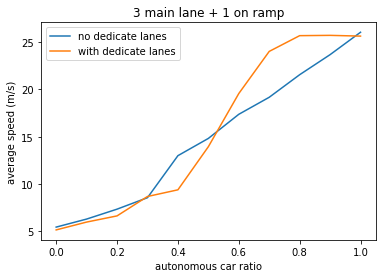

In [39]:
plt.plot(auto_ratio, performance3, label='no dedicate lanes')
plt.plot(auto_ratio, performance3_dedicate, label='with dedicate lanes')
plt.title('3 main lane + 1 on ramp')
plt.xlabel('autonomous car ratio')
plt.ylabel('average speed (m/s)')
plt.legend()

In [13]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance2 = []
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance2.append(speed_auto(auto, 2))

############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  332, average speed 5.24, flow in 5.64 vehicle/s, flow out 0.18 vehicle/s
	 num cars in each lane [ 93. 111. 128.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.10
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  330, average speed 6.22, flow in 6.38 vehicle/s, flow out 0.66 vehicle/s
	 num cars in each lane [ 95. 107. 128.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.20
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  338, average spe

In [16]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance2_dedicate = []
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance2_dedicate.append(speed_auto_dedicate(auto, 2))

############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  224, average speed 5.18
-----------------------------------------------------------------
############################################
auto car ratio = 0.10
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  238, average speed 6.31
-----------------------------------------------------------------
############################################
auto car ratio = 0.20
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  240, average speed 7.52
-----------------------------------------------------------------
############################################
auto car ratio = 0.30
#######################################

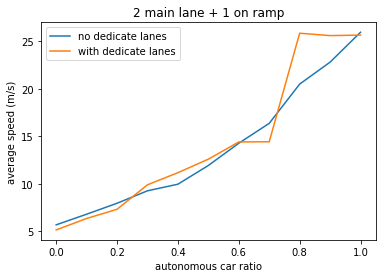

In [28]:
plt.plot(auto_ratio, performance2, label='no dedicate lanes')
plt.plot(auto_ratio, performance2_dedicate, label='with dedicate lanes')
plt.title('2 main lane + 1 on ramp')
plt.xlabel('autonomous car ratio')
plt.ylabel('average speed (m/s)')
plt.legend()

In [18]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance4 = []
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance4.append(speed_auto(auto, 4))

############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  538, average speed 5.22, flow in 9.32 vehicle/s, flow out 0.68 vehicle/s
	 num cars in each lane [ 69.  90. 102. 126. 151.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.10
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  447, average speed 7.83, flow in 10.14 vehicle/s, flow out 2.30 vehicle/s
	 num cars in each lane [ 30.  57.  88. 116. 156.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.20
############################################
-----------------------------------------------------------------
time = 250.00
total vehic

In [19]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance4_dedicate = []
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance4_dedicate.append(speed_auto_dedicate(auto, 4))

############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  443, average speed 5.21
-----------------------------------------------------------------
############################################
auto car ratio = 0.10
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  452, average speed 5.83
-----------------------------------------------------------------
############################################
auto car ratio = 0.20
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  458, average speed 6.42
-----------------------------------------------------------------
############################################
auto car ratio = 0.30
#######################################

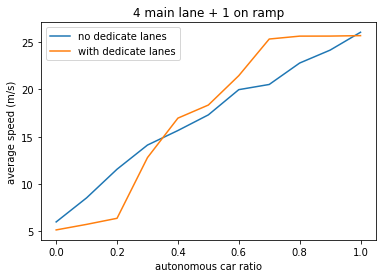

In [27]:
plt.plot(auto_ratio, performance4, label='no dedicate lanes')
plt.plot(auto_ratio, performance4_dedicate, label='with dedicate lanes')
plt.title('4 main lane + 1 on ramp')
plt.xlabel('autonomous car ratio')
plt.ylabel('average speed (m/s)')
plt.legend()

In [22]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance5 = []
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance5.append(speed_auto(auto, 5))

############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  381, average speed 8.80, flow in 10.20 vehicle/s, flow out 3.34 vehicle/s
	 num cars in each lane [  4.  24.  50.  73.  91. 139.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.10
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  342, average speed 10.47, flow in 10.44 vehicle/s, flow out 4.12 vehicle/s
	 num cars in each lane [  7.  24.  38.  64.  86. 123.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.20
############################################
-----------------------------------------------------------------
time = 250.00

In [23]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance5_dedicate = []
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance5_dedicate.append(speed_auto_dedicate(auto, 5))

############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  544, average speed 5.20
-----------------------------------------------------------------
############################################
auto car ratio = 0.10
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  415, average speed 8.15
-----------------------------------------------------------------
############################################
auto car ratio = 0.20
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  263, average speed 13.50
-----------------------------------------------------------------
############################################
auto car ratio = 0.30
######################################

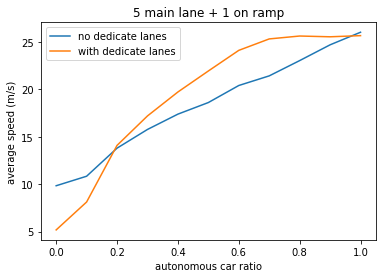

In [26]:
plt.plot(auto_ratio, performance5, label='no dedicate lanes')
plt.plot(auto_ratio, performance5_dedicate, label='with dedicate lanes')
plt.title('5 main lane + 1 on ramp')
plt.xlabel('autonomous car ratio')
plt.ylabel('average speed (m/s)')
plt.legend()

## Experiment 3: average speed v.s. number of lanes

In [40]:
def speed_human_lane(lane):
    prob_auto, prob_car = 0, 0.8
    flow_in = 1.31
    road_length = 1310
    dt = 0.5
    prob_ramp = 0.25
    num_lane = lane

    cf = CarFactory(prob_auto, prob_car)
    road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed_avg.append(np.mean([car.vel for car in road.street]))
        if i % 200 == 0:
            road.report()
    return np.mean(speed_avg)

In [46]:
lanes = [1,2,3,4,5,6,7,8]
performance_lane = []
for lane in lanes:
    print("############################################")
    print("auto car ratio = {:2d}".format(lane))
    print("############################################")
    performance_lane.append(speed_human_lane(lane))

############################################
auto car ratio =  1
############################################
-----------------------------------------------------------------
time = 100.00
total vehicle:   92, average speed 5.39, flow in 1.92 vehicle/s, flow out 0.10 vehicle/s
	 num cars in each lane [38. 54.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 200.00
total vehicle:  183, average speed 5.27, flow in 1.86 vehicle/s, flow out 0.04 vehicle/s
	 num cars in each lane [86. 97.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 300.00
total vehicle:  233, average speed 5.19, flow in 1.86 vehicle/s, flow out 0.86 vehicle/s
	 num cars in each lane [105. 128.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 400.00
t

-----------------------------------------------------------------
time = 400.00
total vehicle:  306, average speed 10.62, flow in 5.24 vehicle/s, flow out 5.34 vehicle/s
	 num cars in each lane [  4.   4.  12.  21.  30.  45.  70. 120.]
-----------------------------------------------------------------
############################################
auto car ratio =  8
############################################
-----------------------------------------------------------------
time = 100.00
total vehicle:  200, average speed 14.99, flow in 5.22 vehicle/s, flow out 1.24 vehicle/s
	 num cars in each lane [ 3.  2.  5.  6. 11. 18. 28. 45. 82.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 200.00
total vehicle:  242, average speed 12.58, flow in 5.24 vehicle/s, flow out 4.40 vehicle/s
	 num cars in each lane [ 3.  1.  1.  8. 16. 24. 39. 59. 91.]
----------------------------------------------------------

In [ ]:
plt.plot(lanes, performance_lane)
plt.title('performance v.s. number of lanes')
plt.xlabel('number of lanes')
plt.ylabel('average speed (m/s)')
plt.axhline(y=25, color='r', linestyle='--')
plt.legend()

## Experiment 4: Snapshot on the point of intersection (dedicate lane v.s. mixed)

In [51]:
## no dedicate lane
prob_auto, prob_car = 0.38, 0.8
flow_in = 1.31
road_length = 1310
dt = 0.5
prob_ramp = 0.25
num_lane = 4

cf = CarFactory(prob_auto, prob_car)
road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)

for i in range(1, int(250 / dt)):
    road.update(flow_in)

In [53]:
fig = generate_fig(road)
py.iplot(fig)

In [4]:
prob_auto, prob_car = 0.38, 0.8
flow_in = 1.31
road_length = 1310
dt = 0.5
prob_ramp = 0.25
num_lane = 4

road = StreetAuto(num_lane, road_length, prob_auto, prob_ramp, dt=dt)
speed_avg = []

for i in range(1, int(250 / dt)):
    road.update(flow_in)

In [5]:
road1 = road.main_road
road2 = road.auto_road

traces = []
for car in road1.street:
    trace = go.Scatter(x = [car.pos, car.pos+car.length],
                       y = [car.lane + 1, car.lane + 1],
                       mode = 'lines',
                       marker = dict( color = color_map['{}'.format(int(car.vel / (5.5)))]
                                       ))
    traces.append(trace)
    
for car in road2.street:
    trace = go.Scatter(x = [car.pos, car.pos+car.length],
                       y = [-car.lane + 2 + 4, -car.lane + 2 + 4],
                       mode = 'lines',
                       marker = dict( color = color_map['{}'.format(int(car.vel / (5.5)))]
                                       ))
    traces.append(trace)
    
# lane seperation
trace = go.Scatter(x = [0, road.main_road.road_length],
                   y = [4.5, 4.5],
                   mode = 'lines',
                   marker = dict( color = 'rgb(0,0,0)')
                  )
traces.append(trace)
                                    

layout = go.Layout(title='traffic simulation at time {:6.1f}s'.format(road.main_road.time),
                   xaxis=dict(title='distance (meters)'),
                   yaxis=dict(title='lane number',
                                showgrid=True,
                                zeroline=False,
                                showline=False,
                                showticklabels=True),
                   showlegend=False)
fig = go.Figure(data= traces, layout=layout)

In [6]:
py.iplot(fig)

## Experiment 5: real world analysis

2030 year 25% auto car

In [21]:
48400 * 0.04 * 2 / 3600

1.0755555555555556

In [58]:
def speed_avg_real(busy, lane, prob_auto=0):
    flow_in = busy * lane * 0.04 / 3600
    prob_car = 0.8
    road_length = 1310
    dt = 0.5
    prob_ramp = 0.2

    cf = CarFactory(prob_auto, prob_car)
    road = StreetRamp(lane, road_length, cf, prob_ramp, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed_avg.append(np.mean([car.vel for car in road.street]))
        if i % 500 == 0:
            road.report()
    return np.average(speed_avg)

In [61]:
def speed_avg_real_df(df):
    speeds = []
    for busy, lane in zip(df['ratio'], df['Number of Lanes INCR MP direction']):
        print('+++++++++++++++++++++++++++++++++++++++')
        print('busy={}, lane={}'.format( busy, lane))
        speeds.append(speed_avg_real(busy, lane))
    return speeds

In [53]:
df = data.sort_values(by=['ratio'], ascending=False).iloc[:30]

In [54]:
speeds = speed_avg_real_df(df)

+++++++++++++++++++++++++++++++++++++++
busy=48400.0, lane=3
-----------------------------------------------------------------
time = 250.00
total vehicle:  440, average speed 5.22, flow in 7.52 vehicle/s, flow out 0.24 vehicle/s
	 num cars in each lane [ 75.  97. 122. 146.]
-----------------------------------------------------------------
+++++++++++++++++++++++++++++++++++++++
busy=47600.0, lane=3
-----------------------------------------------------------------
time = 250.00
total vehicle:  441, average speed 5.23, flow in 7.52 vehicle/s, flow out 0.14 vehicle/s
	 num cars in each lane [ 83. 103. 116. 139.]
-----------------------------------------------------------------
+++++++++++++++++++++++++++++++++++++++
busy=44250.0, lane=2
-----------------------------------------------------------------
time = 250.00
total vehicle:  289, average speed 6.35, flow in 5.58 vehicle/s, flow out 0.78 vehicle/s
	 num cars in each lane [ 67.  96. 126.]
---------------------------------------------

+++++++++++++++++++++++++++++++++++++++
busy=31333.333333333332, lane=3
-----------------------------------------------------------------
time = 250.00
total vehicle:  403, average speed 5.91, flow in 7.44 vehicle/s, flow out 0.94 vehicle/s
	 num cars in each lane [ 66.  91. 110. 136.]
-----------------------------------------------------------------
+++++++++++++++++++++++++++++++++++++++
busy=31166.666666666668, lane=3
-----------------------------------------------------------------
time = 250.00
total vehicle:  385, average speed 5.85, flow in 7.46 vehicle/s, flow out 0.90 vehicle/s
	 num cars in each lane [ 68.  78. 104. 135.]
-----------------------------------------------------------------
+++++++++++++++++++++++++++++++++++++++
busy=31000.0, lane=3
-----------------------------------------------------------------
time = 250.00
total vehicle:  387, average speed 5.90, flow in 7.44 vehicle/s, flow out 0.96 vehicle/s
	 num cars in each lane [ 55.  88. 113. 131.]
------------------

Text(0,0.5,'density')

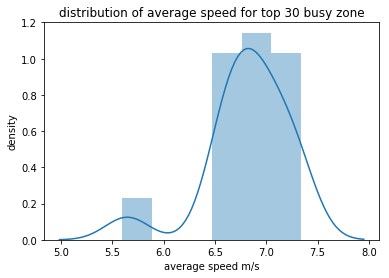

In [57]:
sns.distplot(speeds)
plt.title('distribution of average speed for top 30 busy zone')
plt.xlabel('average speed m/s')
plt.ylabel('density')

In [56]:
speeds

[5.6979439181273746,
 5.592741281011326,
 6.958587328524916,
 6.732337616384019,
 7.31565706662944,
 6.902227536630951,
 6.869081586114552,
 7.0730015686768555,
 6.869195413384881,
 7.1728427343147665,
 7.158621975811157,
 7.177246057302656,
 7.341881566830369,
 7.131408366075938,
 6.525505306580543,
 7.310235551774217,
 6.887253825193822,
 7.339874010553853,
 6.643145922198017,
 6.561322083067448,
 6.608409380494467,
 6.817102269446223,
 6.6312440692940156,
 6.795372451267371,
 6.674336564054435,
 6.89991403877507,
 6.600079824078922,
 6.790777997711574,
 6.550079325693277,
 6.987290555836928]

In [66]:
df = data.sort_values(by=['ratio'], ascending=False).iloc[:20]
def speed_avg_real_df_auto(df):
    speeds = []
    for busy, lane in zip(df['ratio'], df['Number of Lanes INCR MP direction']):
        print('+++++++++++++++++++++++++++++++++++++++')
        print('busy={}, lane={}'.format( busy, lane))
        speeds.append(speed_avg_real(busy, lane, prob_auto=0.25))
    return speeds

In [67]:
speeds = speed_avg_real_df_auto(df)

+++++++++++++++++++++++++++++++++++++++
busy=48400.0, lane=3
-----------------------------------------------------------------
time = 250.00
total vehicle:  421, average speed 7.03, flow in 9.76 vehicle/s, flow out 2.18 vehicle/s
	 num cars in each lane [ 71.  96. 110. 144.]
-----------------------------------------------------------------
+++++++++++++++++++++++++++++++++++++++
busy=47600.0, lane=3
-----------------------------------------------------------------
time = 250.00
total vehicle:  435, average speed 6.89, flow in 9.50 vehicle/s, flow out 2.18 vehicle/s
	 num cars in each lane [ 81.  95. 115. 144.]
-----------------------------------------------------------------
+++++++++++++++++++++++++++++++++++++++
busy=44250.0, lane=2
-----------------------------------------------------------------
time = 250.00
total vehicle:  242, average speed 7.96, flow in 6.58 vehicle/s, flow out 1.94 vehicle/s
	 num cars in each lane [ 52.  74. 116.]
---------------------------------------------

Text(0,0.5,'density')

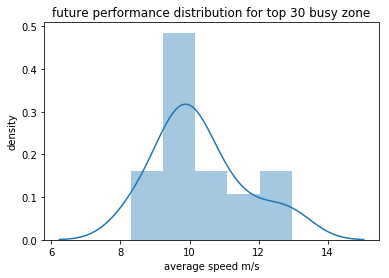

In [69]:
sns.distplot(speeds)
plt.title('future performance distribution for top 30 busy zone')
plt.xlabel('average speed m/s')
plt.ylabel('density')

## Sensitivity Anlysis

In [73]:
road.carfatory.lane_change_human_car

1

In [81]:
def speed_auto_p_factor(auto, num_lane, p_fator):
    prob_auto, prob_car = auto, 0.8
    flow_in = 1.31
    road_length = 1310
    dt = 0.5
    prob_ramp = 0.25

    cf = CarFactory(prob_auto, prob_car)
    cf.lane_change_human_car.p *= p_fator
    cf.lane_change_human_truck.p *= p_fator
    road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed_avg.append(np.mean([car.vel for car in road.street]))
        if i % 500 == 0:
            road.report()
    return np.mean(speed_avg)

In [82]:
def sensitivity_p(p_factor):
    auto_ratio = np.arange(0, 1.01, 0.1)
    performance = []
    for auto in auto_ratio:
        print("############################################")
        print("auto car ratio = {:2.2f}".format(auto))
        print("############################################")
        performance.append( speed_auto_p_factor(auto, 3, p_factor))
    return performance

In [ ]:
speeds = [sensitivity_p(p) for p in np.arange(0.85, 1.16, 0.05)]

############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  440, average speed 5.22, flow in 7.52 vehicle/s, flow out 0.30 vehicle/s
	 num cars in each lane [ 85.  95. 117. 143.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.10
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  427, average speed 6.00, flow in 8.52 vehicle/s, flow out 1.08 vehicle/s
	 num cars in each lane [ 85.  90. 115. 137.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.20
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  436, a

############################################
auto car ratio = 1.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  135, average speed 26.16, flow in 10.44 vehicle/s, flow out 7.80 vehicle/s
	 num cars in each lane [ 2. 10. 44. 79.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  443, average speed 5.22, flow in 7.50 vehicle/s, flow out 0.36 vehicle/s
	 num cars in each lane [ 83. 101. 110. 149.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.10
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  437, ave

############################################
auto car ratio = 0.90
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  147, average speed 23.33, flow in 10.44 vehicle/s, flow out 7.52 vehicle/s
	 num cars in each lane [ 5. 20. 53. 69.]
-----------------------------------------------------------------
############################################
auto car ratio = 1.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  133, average speed 26.08, flow in 10.44 vehicle/s, flow out 7.84 vehicle/s
	 num cars in each lane [ 2.  6. 45. 80.]
-----------------------------------------------------------------
############################################
auto car ratio = 0.00
############################################
-----------------------------------------------------------------
time = 250.00
total vehicle:  437, avera

In [ ]:
def speed_auto_a(auto, num_lane, a):
    prob_auto, prob_car = auto, 0.8
    flow_in = 1.31
    road_length = 1310
    dt = 0.5
    prob_ramp = 0.25

    cf = CarFactory(prob_auto, prob_car)
    
    road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed_avg.append(np.mean([car.vel for car in road.street]))
        if i % 500 == 0:
            road.report()
    return np.mean(speed_avg)